Data Preprocessing

Count the number of missing values in each column and perform missing value treatment. Replace the missing values with the mean or median for numerical columns based on the existing values within the same manufacturer's group and replace the missing values in categorical columns with "Not Available"

ta Using

non

Note: Do not consider all records (rows) while imputing data for missing value treatment




Task 1

A car manufacturer wants to introduce a new car and requires information about the top 5 most preferred car body types. Display the results using a horizontal bar chart.

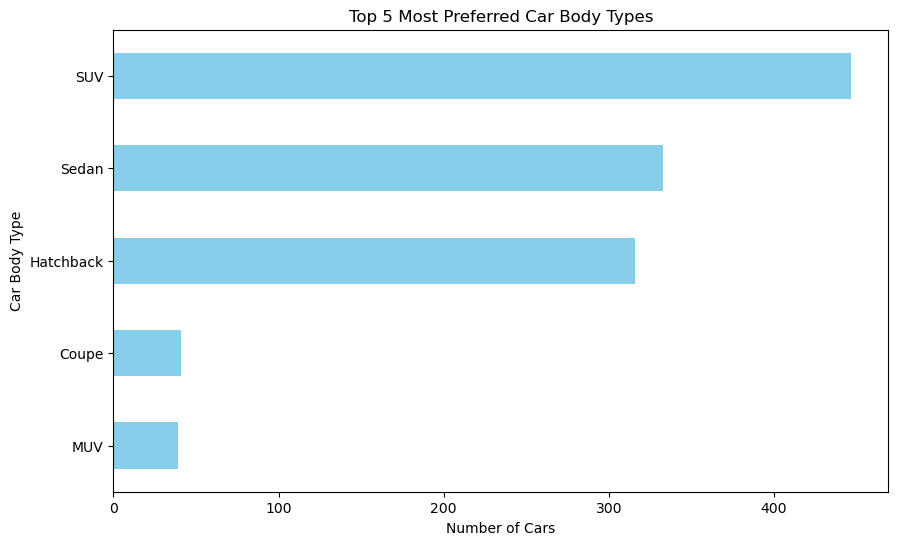

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel(r"C:\Users\Thota Rajasekhar\Downloads\data_python\DS1_C4_S9_Car_Data.xlsx")

# Count the occurrences of each car body type
body_type_counts = df['Body_Type'].value_counts()

# Select the top 5 most preferred body types
top_5_body_types = body_type_counts.head(5)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
top_5_body_types.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Cars')
plt.ylabel('Car Body Type')
plt.title('Top 5 Most Preferred Car Body Types')
plt.gca().invert_yaxis()  # Optional: To display the most preferred body type on top
plt.show()


Task 2

List all the details of cars that can adapt to various driving conditions such as normal, comfort, eco, sport, and power mode

How many cars have all the above-mentioned features?

In [34]:
import pandas as pd

# Load the dataset
df = pd.read_excel(r"C:\Users\Thota Rajasekhar\Downloads\data_python\DS1_C4_S9_Car_Data.xlsx")

# Define the desired modes
desired_modes = ['normal', 'comfort', 'eco', 'sport', 'power']

# Check if the 'DrivingModes' column exists in the DataFrame
if 'DrivingModes' in df.columns:
    # Assuming 'DrivingModes' column contains a string of comma-separated values
    # Convert each entry to a set for comparison
    cars_with_all_modes = df[df['DrivingModes'].apply(lambda modes: set(modes.split(', ')) == set(desired_modes))]
    
    # Print the results (assuming 'Car Model' is the column containing car names)
    print("Cars with all desired driving modes:")
    print(cars_with_all_modes[['Car Model', 'DrivingModes']])

    # Count the number of cars
    num_cars = len(cars_with_all_modes)
    print(f"\nTotal number of cars with all desired driving modes: {num_cars}")
else:
    print("Error: 'DrivingModes' column not found in the DataFrame.")


Error: 'DrivingModes' column not found in the DataFrame.


Task 3

Identify the top 10 car manufacturers based on the city mileage and display the result using a horizontal bar graph with the manufacturer on the y-axis and mileage on the x-axis

Do you notice any outliers in the above output? If yes, what is the reason, and how would you resolve it?

?

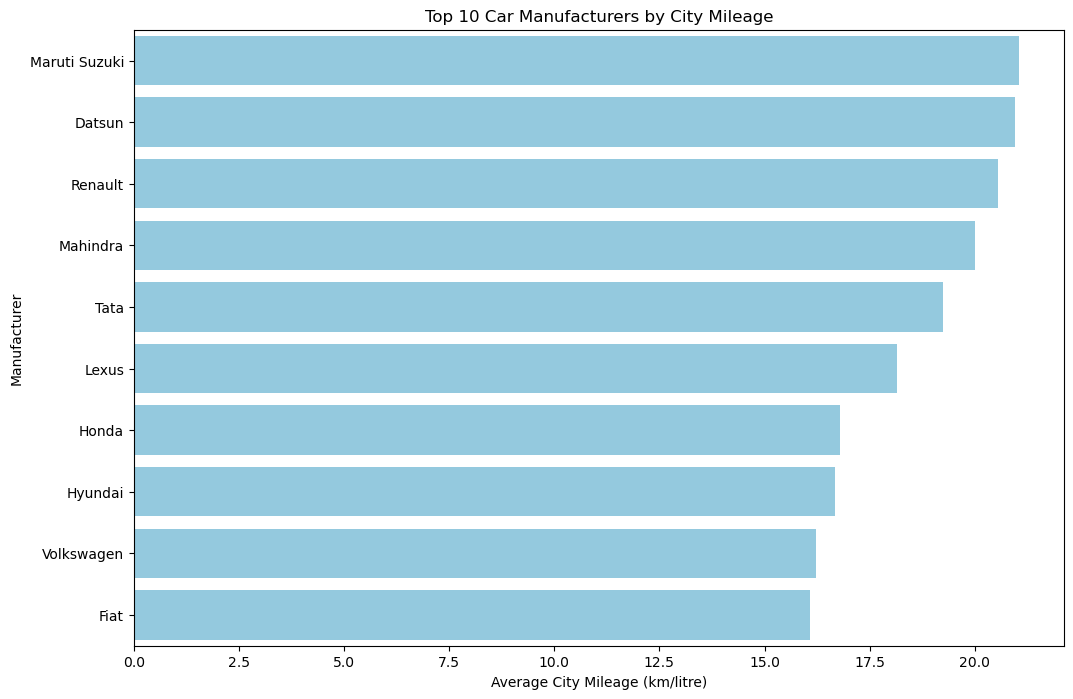

Outliers detected in the City Mileage data:
         Make  City_Mileage_km_litre
615  Mahindra                   80.0
616  Mahindra                   80.0
687  Mahindra                  110.0
688  Mahindra                  110.0
689  Mahindra                  110.0


In [233]:


# Ensure the 'City_Mileage_km_litre' column is numeric
df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')

# Group by manufacturer and calculate the mean city mileage
mileage_by_make = df.groupby('Make')['City_Mileage_km_litre'].mean()

# Get the top 10 manufacturers based on city mileage
top_10_mileage = mileage_by_make.nlargest(10)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_mileage.values, y=top_10_mileage.index, color='skyblue')
plt.title('Top 10 Car Manufacturers by City Mileage')
plt.xlabel('Average City Mileage (km/litre)')
plt.ylabel('Manufacturer')
plt.show()

# Checking for outliers
# Calculate z-scores for the entire column, including NaNs
z_scores = stats.zscore(df['City_Mileage_km_litre'].fillna(df['City_Mileage_km_litre'].mean()))

# Filter outliers based on z-scores
df['z_score'] = z_scores
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

if not outliers.empty:
    print("Outliers detected in the City Mileage data:")
    print(outliers[['Make', 'City_Mileage_km_litre']])
else:
    print("No significant outliers detected in the City Mileage data.")

Task 4

Identify the top 20 non-electric car manufacturers based on city mileage and display the results using a bar graph similar to that in task 1

Column names in the dataset:
Index(['S. No.', 'Make', 'Model', 'Variant', 'Displacement', 'Cylinders',
       'Valves_Per_Cylinder', 'Fuel_Tank_Capacity_litre', 'Fuel_Type',
       'Height_mm', 'Length_mm', 'Width_mm', 'Body_Type', 'Doors',
       'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Kerb_Weight',
       'Power', 'Torque', 'Seating_Capacity', 'Central_Locking',
       'Child_Safety_Locks', 'Hill_Assist', 'Drive_Modes',
       'High_Speed_Alert_System', 'ABS_(Anti-lock_Braking_System)',
       'Gross_Vehicle_Weight', 'Airbags', 'Door_Ajar_Warning',
       'Fasten_Seat_Belt_Warning', 'z_score'],
      dtype='object')

First few rows of the dataset:
   S. No.  Make      Model  Variant  Displacement  Cylinders  \
0       0  Tata  Nano Genx       Xt         624.0        2.0   
1       1  Tata  Nano Genx       Xe         624.0        2.0   
2       2  Tata  Nano Genx  Emax Xm         624.0        2.0   
3       3  Tata  Nano Genx      Xta         624.0        2.0   
4       

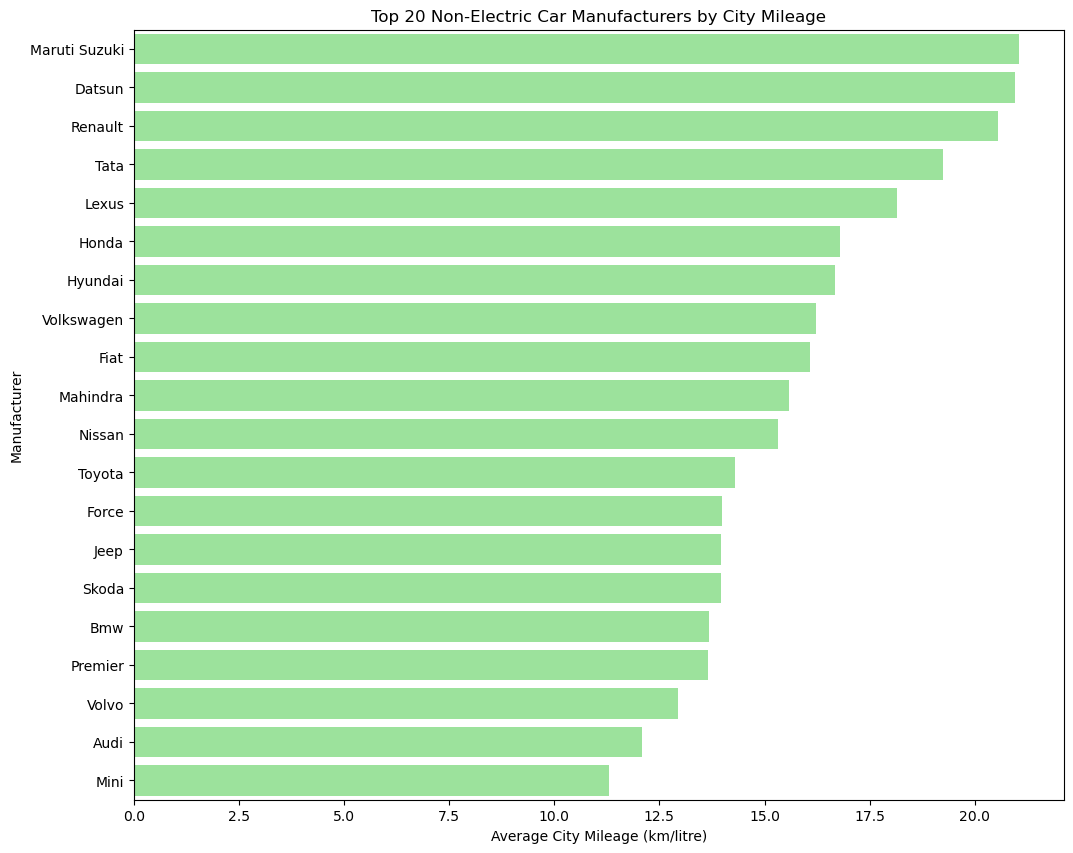

In [235]:


# Display the column names to check for the correct column
print("Column names in the dataset:")
print(df.columns)

# Inspect the first few rows to understand the data structure
print("\nFirst few rows of the dataset:")
print(df.head())

# Ensure the 'City_Mileage_km_litre' column is numeric
df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')

# Assume you find the correct column for car type, for example 'Fuel_Type'
# Replace 'Fuel_Type' with the correct column name and value
# Exclude electric cars (update 'Fuel_Type' and 'Electric' as per your dataset)
non_electric_df = df[df['Fuel_Type'] != 'Electric']

# Group by manufacturer and calculate the mean city mileage
mileage_by_make_non_electric = non_electric_df.groupby('Make')['City_Mileage_km_litre'].mean()

# Get the top 20 manufacturers based on city mileage
top_20_non_electric_mileage = mileage_by_make_non_electric.nlargest(20)

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(x=top_20_non_electric_mileage.values, y=top_20_non_electric_mileage.index, color='lightgreen')
plt.title('Top 20 Non-Electric Car Manufacturers by City Mileage')
plt.xlabel('Average City Mileage (km/litre)')
plt.ylabel('Manufacturer')
plt.show()


Task 5

Display the car mileages for the following four companies using a pivot table: Hyundai, Mahindra, Renault, and Skoda

Create 4 separate pivot tables capturing the following details

1. Mean of city mileage 2. Median of city mileage

3. Mean of highway mileage

4. Median of highway mileage

In [129]:

# Filter the dataset for the four companies: Hyundai, Mahindra, Renault, and Skoda
selected_companies = df[df['Make'].isin(['Hyundai', 'Mahindra', 'Renault', 'Skoda'])]

# 1. Pivot table for the mean of city mileage
pivot_mean_city_mileage = pd.pivot_table(selected_companies, values='City_Mileage_km_litre', index='Make', aggfunc='mean')
print("Mean of City Mileage:")
print(pivot_mean_city_mileage)

# 2. Pivot table for the median of city mileage
pivot_median_city_mileage = pd.pivot_table(selected_companies, values='City_Mileage_km_litre', index='Make', aggfunc='median')
print("\nMedian of City Mileage:")
print(pivot_median_city_mileage)

# 3. Pivot table for the mean of highway mileage
pivot_mean_highway_mileage = pd.pivot_table(selected_companies, values='Highway_Mileage_km_litre', index='Make', aggfunc='mean')
print("\nMean of Highway Mileage:")
print(pivot_mean_highway_mileage)

# 4. Pivot table for the median of highway mileage
pivot_median_highway_mileage = pd.pivot_table(selected_companies, values='Highway_Mileage_km_litre', index='Make', aggfunc='median')
print("\nMedian of Highway Mileage:")
print(pivot_median_highway_mileage)


Mean of City Mileage:
          City_Mileage_km_litre
Make                           
Hyundai               16.679853
Mahindra              20.003763
Renault               20.554286
Skoda                 13.953333

Median of City Mileage:
          City_Mileage_km_litre
Make                           
Hyundai                   16.38
Mahindra                  16.00
Renault                   21.04
Skoda                     14.50

Mean of Highway Mileage:
          Highway_Mileage_km_litre
Make                              
Hyundai                  18.294146
Mahindra                 18.140175
Renault                  17.690000
Skoda                    17.268529

Median of Highway Mileage:
          Highway_Mileage_km_litre
Make                              
Hyundai                      18.50
Mahindra                     17.21
Renault                      19.60
Skoda                        16.00


Task 6

Display the mean and median values of city mileages of the following manufacturers, using a stacked column chart Hyundai, Renault, Mahindra, and Skoda

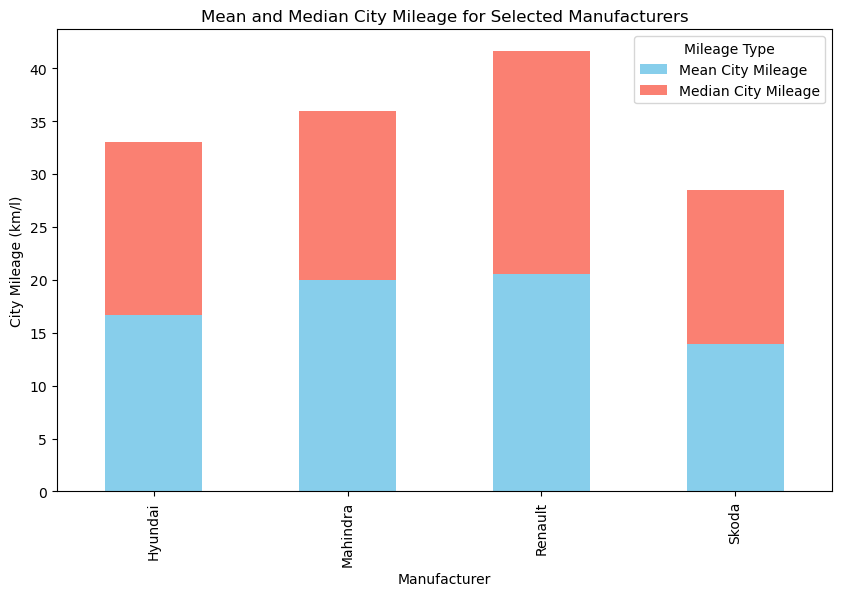

In [127]:

# Filter the dataset for the selected manufacturers
selected_manufacturers = df[df['Make'].isin(['Hyundai', 'Renault', 'Mahindra', 'Skoda'])]

# Compute mean and median city mileage
mean_mileage = selected_manufacturers.groupby('Make')['City_Mileage_km_litre'].mean()
median_mileage = selected_manufacturers.groupby('Make')['City_Mileage_km_litre'].median()

# Combine the mean and median data into a single DataFrame
mileage_summary = pd.DataFrame({
    'Mean City Mileage': mean_mileage,
    'Median City Mileage': median_mileage
})

# Plot the stacked column chart
mileage_summary.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'])
plt.xlabel('Manufacturer')
plt.ylabel('City Mileage (km/l)')
plt.title('Mean and Median City Mileage for Selected Manufacturers')
plt.legend(title='Mileage Type')
plt.show()


Task 7

Display the average mileage (city and highway) of all manufacturers using a horizontal bar chart, in ascending order of mileage

<Figure size 1200x800 with 0 Axes>

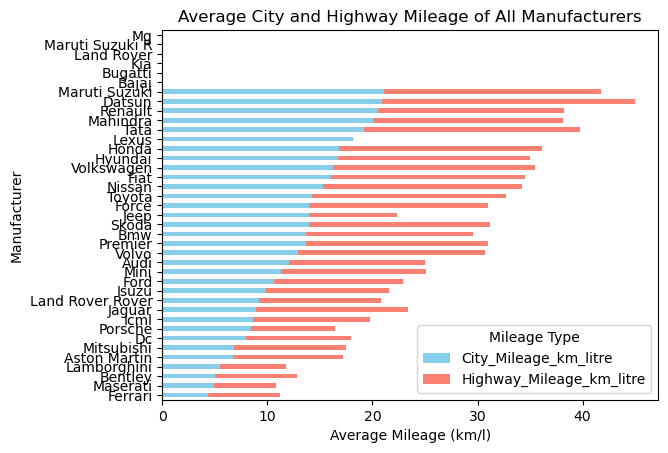

In [125]:

# Group by manufacturer and calculate the average city and highway mileage
average_mileage = df.groupby('Make')[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].mean()

# Sort by average city mileage and highway mileage in ascending order
average_mileage_sorted = average_mileage.sort_values(by=['City_Mileage_km_litre', 'Highway_Mileage_km_litre'], ascending=True)

# Plot the horizontal bar chart
plt.figure(figsize=(12, 8))
average_mileage_sorted.plot(kind='barh', stacked=True, color=['skyblue', 'salmon'])
plt.xlabel('Average Mileage (km/l)')
plt.ylabel('Manufacturer')
plt.title('Average City and Highway Mileage of All Manufacturers')
plt.legend(title='Mileage Type')
plt.show()


Task 8

Plot a line chart to understand the relation between displacement and city mileage by choosing the top 10 cars with the highest city mileage.

What do you infer from this graph? Are there any unusual observations? If yes, how would you resolve these?

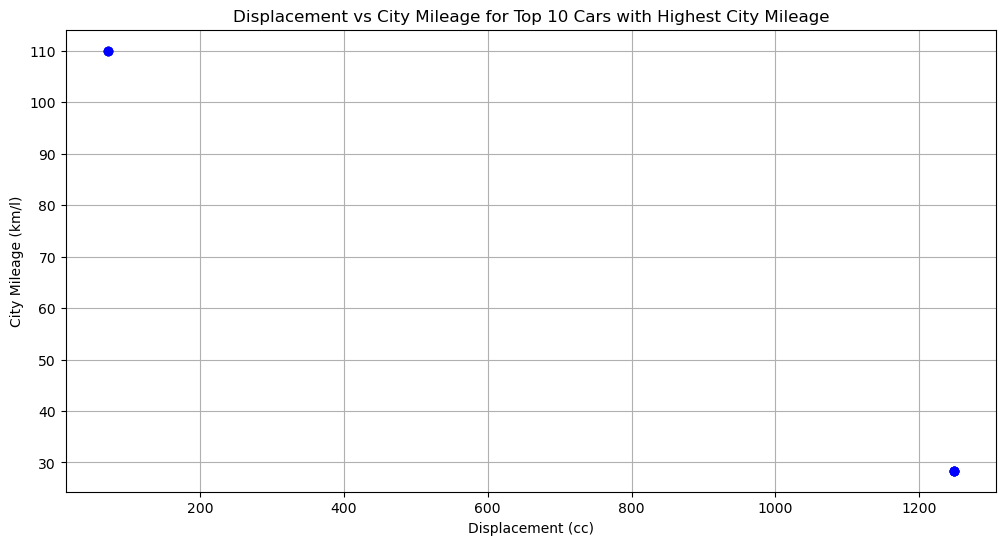

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel(r"C:\Users\Thota Rajasekhar\Downloads\data_python\DS1_C4_S9_Car_Data.xlsx")

# Select the top 10 cars with the highest city mileage
top_10_cars = df.nlargest(10, 'City_Mileage_km_litre')

# Plot the line chart to show the relationship between displacement and city mileage
plt.figure(figsize=(12, 6))
plt.plot(top_10_cars['Displacement'], top_10_cars['City_Mileage_km_litre'], marker='o', linestyle='-', color='b')
plt.xlabel('Displacement (cc)')
plt.ylabel('City Mileage (km/l)')
plt.title('Displacement vs City Mileage for Top 10 Cars with Highest City Mileage')
plt.grid(True)
plt.show()


Task 9

Analyze the spread of fuel economy using a histogram for all car models of the following manufacturers Hyundai, Suzuki, Tata, and BMW

Which of these manufacturers has the most skewed mileage

distribution? Note: A separate histogram is required for each

manufacturer

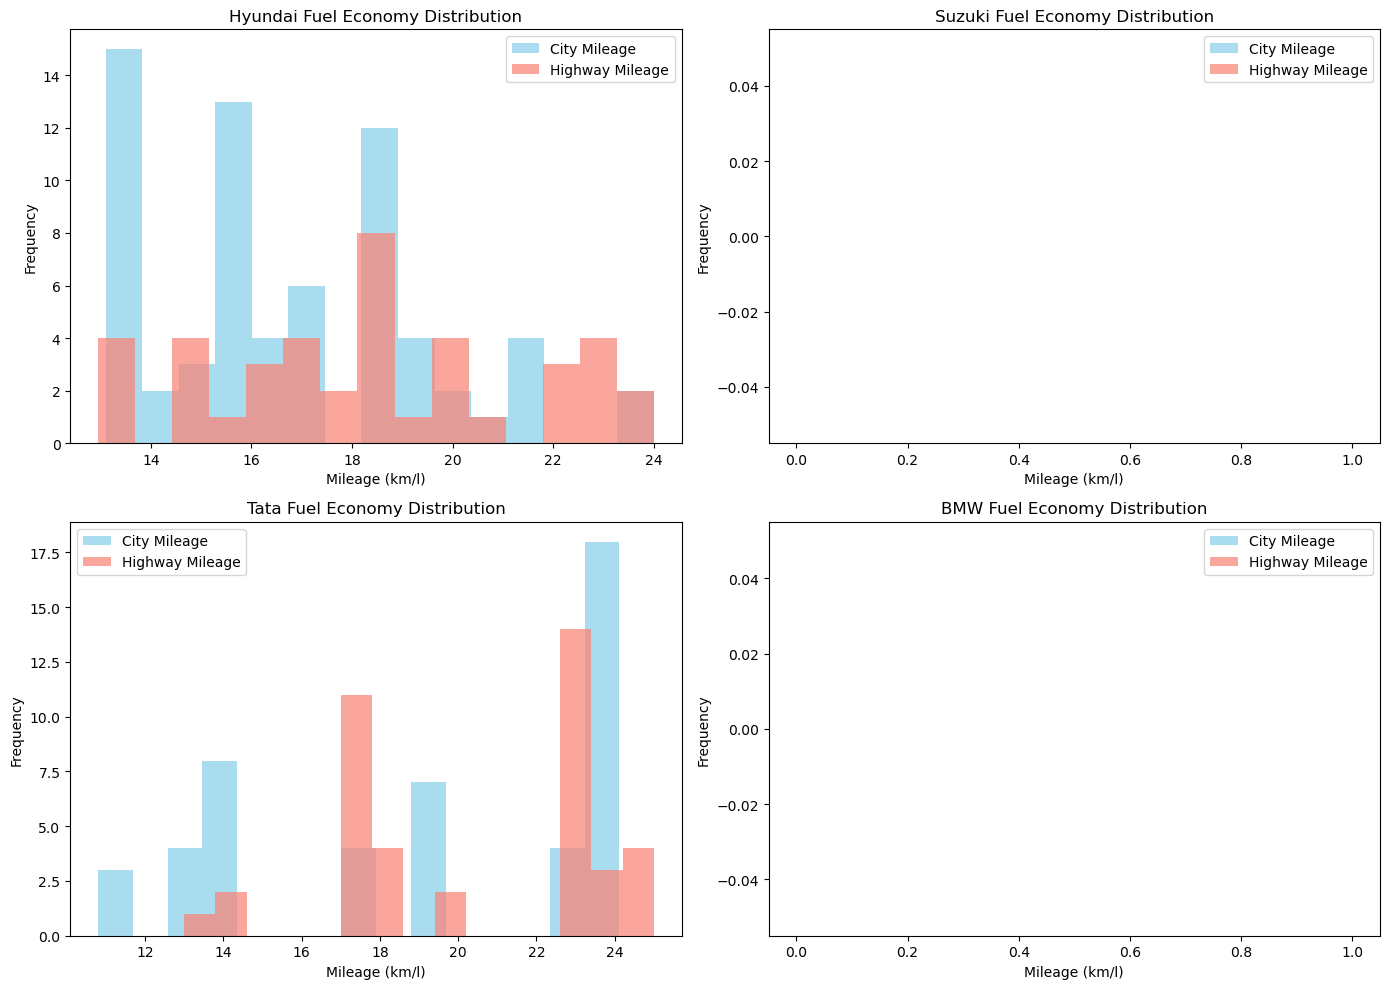

In [137]:

# Filter the dataset for the selected manufacturers
selected_manufacturers = df[df['Make'].isin(['Hyundai', 'Suzuki', 'Tata', 'BMW'])]

# Define a list of manufacturers to iterate over
manufacturers = ['Hyundai', 'Suzuki', 'Tata', 'BMW']

# Set up the figure for plotting histograms
plt.figure(figsize=(14, 10))

for i, manufacturer in enumerate(manufacturers):
    plt.subplot(2, 2, i+1)
    manufacturer_data = selected_manufacturers[selected_manufacturers['Make'] == manufacturer]
    
    # Plot histograms for city mileage and highway mileage
    plt.hist(manufacturer_data['City_Mileage_km_litre'], bins=15, alpha=0.7, label='City Mileage', color='skyblue')
    plt.hist(manufacturer_data['Highway_Mileage_km_litre'], bins=15, alpha=0.7, label='Highway Mileage', color='salmon')
    
    plt.title(f'{manufacturer} Fuel Economy Distribution')
    plt.xlabel('Mileage (km/l)')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


Task 10

Create another data frame that includes only the following columns from the data. Perform missing value treatment, if required.

Valves Per Cylinder

Kerb_Weight

Make

Displacement

Fuel_Tank_Capacity_litre

City_Mileage_km_litre

Highway Mileage_km_litre

Power Torque

Gross_Vehicle_Weight

In [159]:
import pandas as pd

# Load the data from the Excel file
file_path = r'C:\Users\Thota Rajasekhar\Downloads\data_python\DS1_C4_S9_Car_Data.xlsx'
df = pd.read_excel(file_path)

# Define the columns of interest
columns_of_interest = [
    'Valves_Per_Cylinder',
    'Kerb_Weight',
    'Make',
    'Displacement',
    'Fuel_Tank_Capacity_litre',
    'City_Mileage_km_litre',
    'Highway_Mileage_km_litre',
    'Power',
    'Torque',
    'Gross_Vehicle_Weight'
]

# Create a new DataFrame with only the selected columns
df_selected = df[columns_of_interest].copy()

# Convert columns to numeric where applicable
def convert_to_numeric(column):
    # Remove non-numeric characters (e.g., 'kg', 'l') and convert to numeric
    return pd.to_numeric(column.replace(r'[^\d.]+', '', regex=True), errors='coerce')

# Apply conversion to relevant columns
numeric_columns = [
    'Kerb_Weight',
    'Displacement',
    'Fuel_Tank_Capacity_litre',
    'City_Mileage_km_litre',
    'Highway_Mileage_km_litre',
    'Power',
    'Torque',
    'Gross_Vehicle_Weight'
]

for col in numeric_columns:
    df_selected.loc[:, col] = convert_to_numeric(df_selected[col].astype(str))

# Display the first few rows of the new DataFrame
print("First few rows of the new DataFrame:")
print(df_selected.head())

# Check for missing values
missing_values = df_selected.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Handling missing values
# Fill missing numerical values with the median of the column
df_selected.fillna(df_selected.median(numeric_only=True), inplace=True)

# Verify that there are no more missing values
missing_values_after = df_selected.isnull().sum()
print("\nMissing values after treatment:")
print(missing_values_after)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_selected.head())


First few rows of the new DataFrame:
   Valves_Per_Cylinder Kerb_Weight  Make  Displacement  \
0                  2.0       660.0  Tata         624.0   
1                  2.0       725.0  Tata         624.0   
2                  2.0       710.0  Tata         624.0   
3                  2.0       725.0  Tata         624.0   
4                  2.0       725.0  Tata         624.0   

   Fuel_Tank_Capacity_litre  City_Mileage_km_litre  Highway_Mileage_km_litre  \
0                      24.0                   23.6                       NaN   
1                      24.0                   23.6                       NaN   
2                      15.0                    NaN                       NaN   
3                      24.0                   23.6                       NaN   
4                      24.0                   23.6                       NaN   

   Power  Torque Gross_Vehicle_Weight  
0   38.0    51.0                  NaN  
1   38.0    51.0                  NaN  
2   38.0    5

Task 11

Preprocess the data in the following columns as specified Kerb weight: Remove "kg" and ensure the column is numerical Convert the weight in kilograms to pounds, by multiplying each value in the column with the number 2.2. Gross Vehicle Weight: Remove "kg" and ensure the column is numerical. Convert the weight in kilograms to pounds, by multiplying each value in the column with the number 2.2

In [178]:

# Define the columns of interest
columns_of_interest = [
    'Valves_Per_Cylinder',
    'Kerb_Weight',
    'Make',
    'Displacement',
    'Fuel_Tank_Capacity_litre',
    'City_Mileage_km_litre',
    'Highway_Mileage_km_litre',
    'Power',
    'Torque',
    'Gross_Vehicle_Weight'
]

# Create a new DataFrame with only the selected columns
df_selected = df[columns_of_interest].copy()

# Function to preprocess weight columns
def preprocess_weight(column):
    # Remove 'kg' and convert to numeric
    column = pd.to_numeric(column.str.replace('kg', '', regex=False), errors='coerce')
    # Convert kilograms to pounds
    return column * 2.2

# Preprocess the specified columns
df_selected['Kerb_Weight'] = preprocess_weight(df_selected['Kerb_Weight'].astype(str))
df_selected['Gross_Vehicle_Weight'] = preprocess_weight(df_selected['Gross_Vehicle_Weight'].astype(str))

# Display the first few rows of the updated DataFrame
print("First few rows of the updated DataFrame:")
print(df_selected.head())


First few rows of the updated DataFrame:
   Valves_Per_Cylinder  Kerb_Weight  Make  Displacement  \
0                  2.0       1452.0  Tata         624.0   
1                  2.0       1595.0  Tata         624.0   
2                  2.0       1562.0  Tata         624.0   
3                  2.0       1595.0  Tata         624.0   
4                  2.0       1595.0  Tata         624.0   

   Fuel_Tank_Capacity_litre  City_Mileage_km_litre  Highway_Mileage_km_litre  \
0                      24.0                   23.6                       NaN   
1                      24.0                   23.6                       NaN   
2                      15.0                    NaN                       NaN   
3                      24.0                   23.6                       NaN   
4                      24.0                   23.6                       NaN   

   Power  Torque  Gross_Vehicle_Weight  
0   38.0    51.0                   NaN  
1   38.0    51.0                   NaN  


Task 12

Compare the performance of cars based on factors such as displacement, cylinders, and valves per cylinder, providing valuable insights for marketing and product development

Hint: Calculate and display the mean, median, standard deviation, and coefficient of variation for each manufacturer.

For the "Displacement" column, display the distribution for each manufacturer using box plots.

Performance Statistics by Manufacturer:
                  Displacement_mean  Displacement_median  Displacement_std  \
Make                                                                         
Aston Martin            5038.333333               5198.0        986.241519   
Audi                    2256.354839               1984.0        836.304352   
Bajaj                    216.000000                216.0          0.000000   
Bentley                 5447.833333               5974.0       1164.710164   
Bmw                     2707.918919               2979.0        924.567237   
Bugatti                 7993.000000               7993.0          0.000000   
Datsun                  1065.066667               1198.0        179.470836   
Dc                      2000.000000               2000.0               NaN   
Ferrari                 4589.500000               3902.0       1125.891647   
Fiat                    1269.391304               1248.0         65.088568   
Force                   

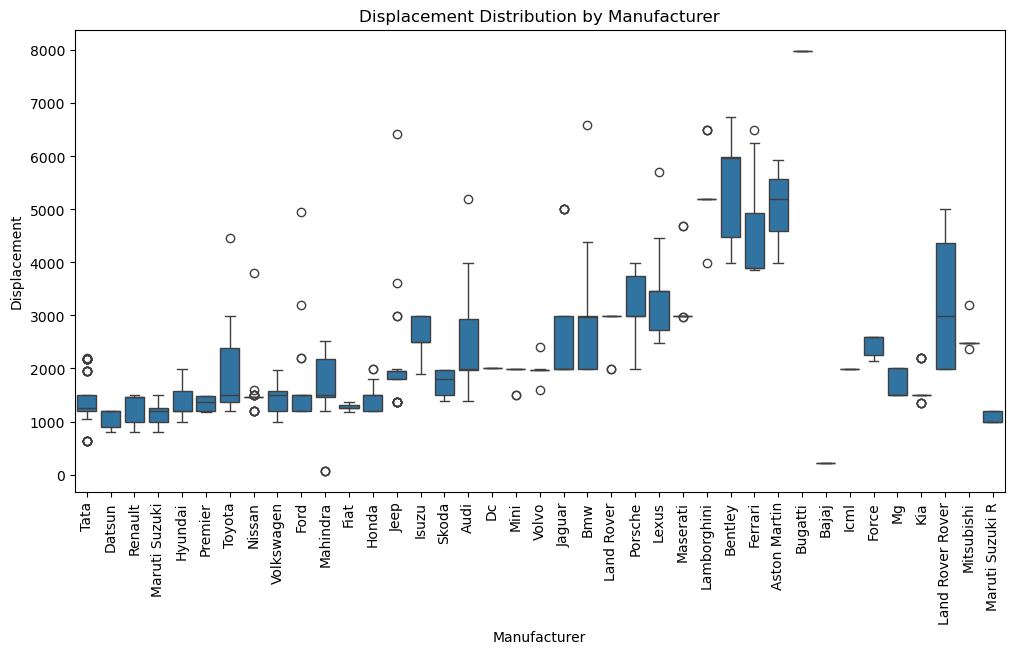

In [180]:

# Define the columns of interest
columns_of_interest = [
    'Valves_Per_Cylinder',
    'Kerb_Weight',
    'Make',
    'Displacement',
    'Fuel_Tank_Capacity_litre',
    'City_Mileage_km_litre',
    'Highway_Mileage_km_litre',
    'Power',
    'Torque',
    'Gross_Vehicle_Weight'
]

# Create a new DataFrame with only the selected columns
df_selected = df[columns_of_interest].copy()

# Convert columns to numeric where applicable
def convert_to_numeric(column):
    # Remove non-numeric characters and convert to numeric
    return pd.to_numeric(column.str.replace(r'[^\d.]+', '', regex=True), errors='coerce')

# Apply conversion to relevant columns
numeric_columns = [
    'Kerb_Weight',
    'Displacement',
    'Fuel_Tank_Capacity_litre',
    'City_Mileage_km_litre',
    'Highway_Mileage_km_litre',
    'Power',
    'Torque',
    'Gross_Vehicle_Weight'
]

for col in numeric_columns:
    df_selected[col] = convert_to_numeric(df_selected[col].astype(str))

# Handle missing values
df_selected.fillna(df_selected.median(numeric_only=True), inplace=True)

# Calculate performance statistics
performance_stats = df_selected.groupby('Make').agg({
    'Displacement': ['mean', 'median', 'std'],
    'Valves_Per_Cylinder': ['mean', 'median', 'std'],
    'Kerb_Weight': ['mean', 'median', 'std']
})

# Calculate coefficient of variation
performance_stats.columns = ['_'.join(col).strip() for col in performance_stats.columns.values]
performance_stats['Displacement_cv'] = performance_stats['Displacement_std'] / performance_stats['Displacement_mean']
performance_stats['Valves_Per_Cylinder_cv'] = performance_stats['Valves_Per_Cylinder_std'] / performance_stats['Valves_Per_Cylinder_mean']
performance_stats['Kerb_Weight_cv'] = performance_stats['Kerb_Weight_std'] / performance_stats['Kerb_Weight_mean']

# Display statistics
print("Performance Statistics by Manufacturer:")
print(performance_stats)

# Box plot for Displacement
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Displacement', data=df_selected)
plt.xticks(rotation=90)
plt.title('Displacement Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Displacement')
plt.show()


Task 13

Identify at least three features that affect the mileages (using correlation analysis) of cars from the following manufacturers Renault, Toyota, and Honda Represent them visually using appropriate types of charts/graphs in Python.

Illustrate with justification whether these factors affect the mileage of a car positively or negatively

?

Correlation Matrix:
                          City_Mileage_km_litre  Highway_Mileage_km_litre  \
City_Mileage_km_litre                  1.000000                  0.506044   
Highway_Mileage_km_litre               0.506044                  1.000000   
Kerb_Weight                           -0.509170                 -0.242226   
Displacement                          -0.566843                 -0.375446   
Power                                 -0.636985                 -0.487389   
Torque                                -0.374798                 -0.230798   

                          Kerb_Weight  Displacement     Power    Torque  
City_Mileage_km_litre       -0.509170     -0.566843 -0.636985 -0.374798  
Highway_Mileage_km_litre    -0.242226     -0.375446 -0.487389 -0.230798  
Kerb_Weight                  1.000000      0.867730  0.855207  0.834094  
Displacement                 0.867730      1.000000  0.933356  0.875644  
Power                        0.855207      0.933356  1.000000  0.78994

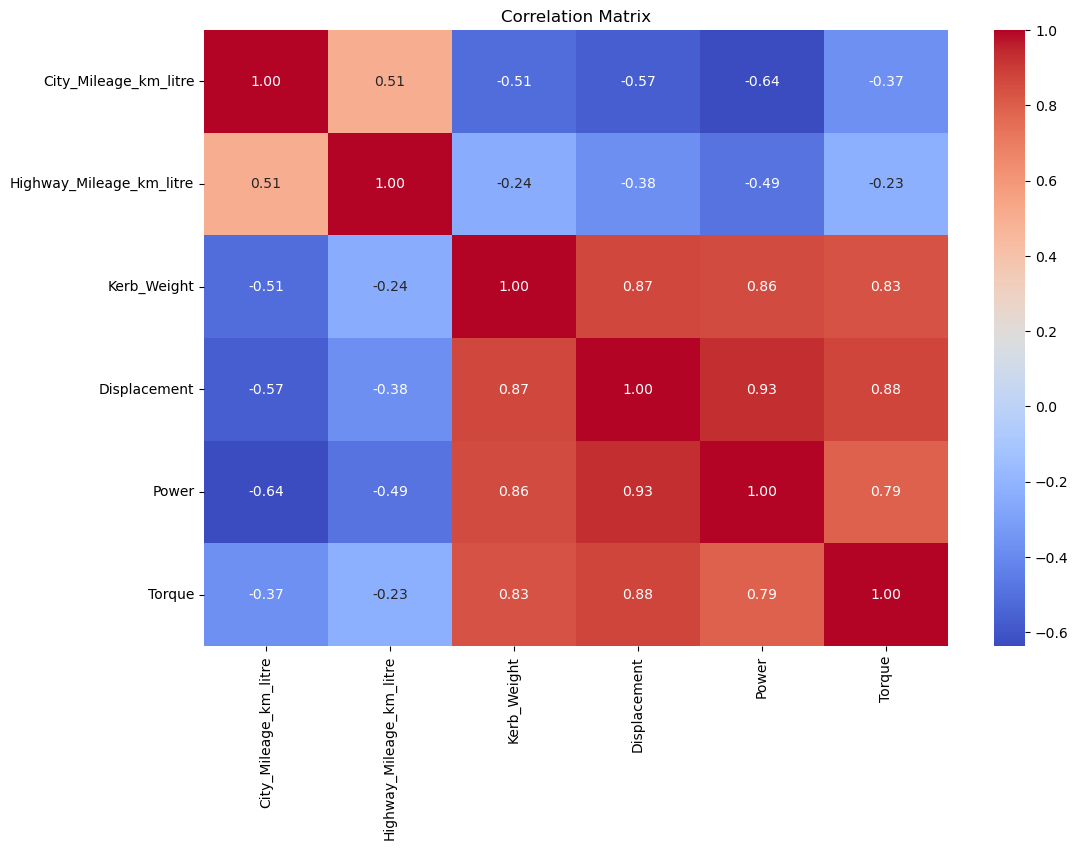

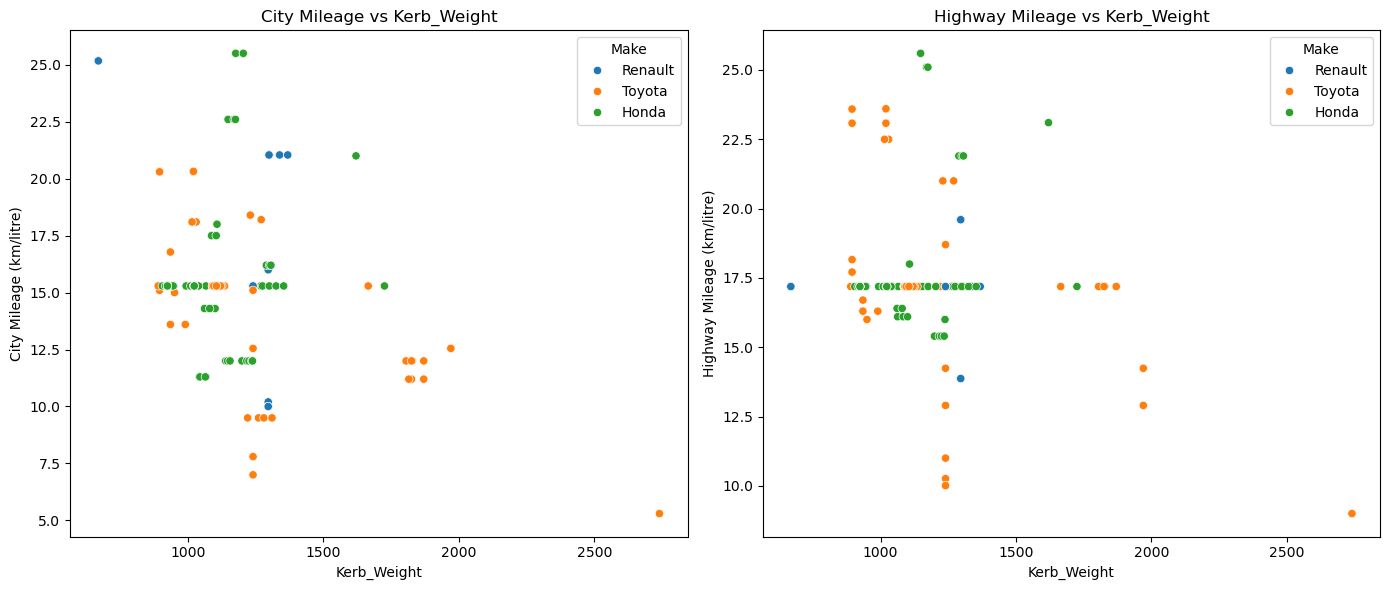

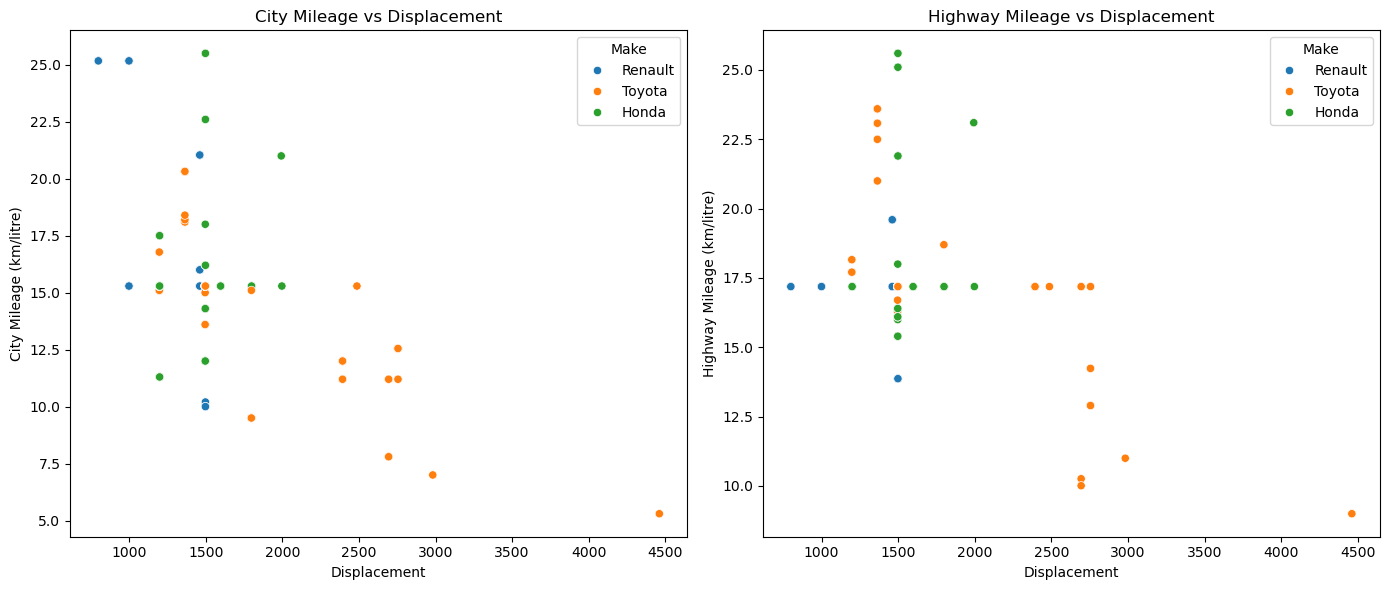

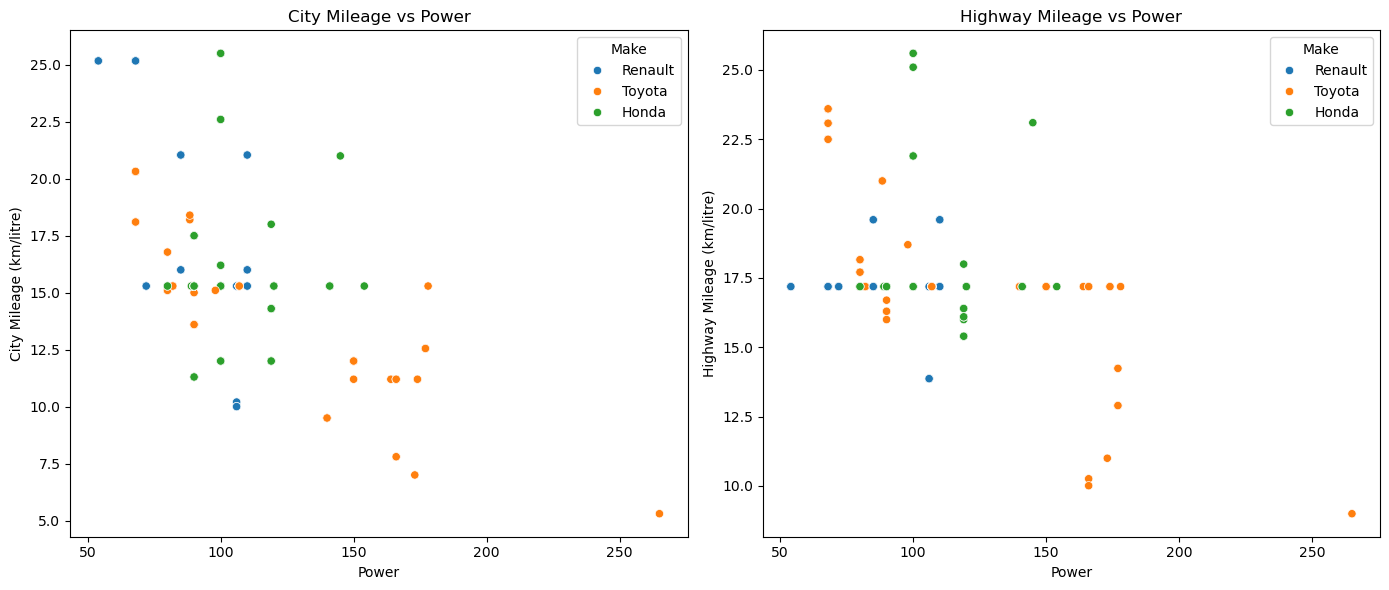

In [184]:



# Create a new DataFrame with only the selected columns
df_selected = df[columns_of_interest].copy()

# Convert columns to numeric where applicable
def convert_to_numeric(column):
    # Remove non-numeric characters and convert to numeric
    return pd.to_numeric(column.str.replace(r'[^\d.]+', '', regex=True), errors='coerce')

numeric_columns = [
    'Kerb_Weight',
    'Displacement',
    'Power',
    'Torque'
]

for col in numeric_columns:
    df_selected[col] = convert_to_numeric(df_selected[col].astype(str))

# Handle missing values
df_selected.fillna(df_selected.median(numeric_only=True), inplace=True)

# Filter data for Renault, Toyota, and Honda
df_filtered = df_selected[df_selected['Make'].isin(['Renault', 'Toyota', 'Honda'])]

# Calculate correlation matrix
correlation_matrix = df_filtered[['City_Mileage_km_litre', 'Highway_Mileage_km_litre'] + numeric_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Plot scatter plots for the top 3 features affecting mileage
top_features = ['Kerb_Weight', 'Displacement', 'Power']

for feature in top_features:
    plt.figure(figsize=(14, 6))

    # Scatter plot for City Mileage
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=feature, y='City_Mileage_km_litre', data=df_filtered, hue='Make')
    plt.title(f'City Mileage vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('City Mileage (km/litre)')

    # Scatter plot for Highway Mileage
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=feature, y='Highway_Mileage_km_litre', data=df_filtered, hue='Make')
    plt.title(f'Highway Mileage vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Highway Mileage (km/litre)')

    plt.tight_layout()
    plt.show()


Task 14

Compare the performance of cars based on factors like kerb weight and gross vehicle weight.

Hint: Calculate and display the mean, median, standard deviation, and coefficient of variation for each manufacturer

In [186]:


# Define the columns of interest
columns_of_interest = [
    'Make',
    'Kerb_Weight',
    'Gross_Vehicle_Weight'
]

# Create a new DataFrame with only the selected columns
df_selected = df[columns_of_interest].copy()

# Convert columns to numeric where applicable
def convert_to_numeric(column):
    # Remove non-numeric characters and convert to numeric
    return pd.to_numeric(column.str.replace(r'[^\d.]+', '', regex=True), errors='coerce')

numeric_columns = [
    'Kerb_Weight',
    'Gross_Vehicle_Weight'
]

for col in numeric_columns:
    df_selected[col] = convert_to_numeric(df_selected[col].astype(str))

# Handle missing values
df_selected.fillna(df_selected.median(numeric_only=True), inplace=True)

# Calculate performance statistics
performance_stats = df_selected.groupby('Make').agg({
    'Kerb_Weight': ['mean', 'median', 'std'],
    'Gross_Vehicle_Weight': ['mean', 'median', 'std']
})

# Calculate coefficient of variation
performance_stats.columns = ['_'.join(col).strip() for col in performance_stats.columns.values]
performance_stats['Kerb_Weight_cv'] = performance_stats['Kerb_Weight_std'] / performance_stats['Kerb_Weight_mean']
performance_stats['Gross_Vehicle_Weight_cv'] = performance_stats['Gross_Vehicle_Weight_std'] / performance_stats['Gross_Vehicle_Weight_mean']

# Display statistics
print("Performance Statistics by Manufacturer:")
print(performance_stats)


Performance Statistics by Manufacturer:
                  Kerb_Weight_mean  Kerb_Weight_median  Kerb_Weight_std  \
Make                                                                      
Aston Martin          1.733333e+03              1680.0     2.345918e+02   
Audi                  1.810000e+03              1780.0     3.423789e+02   
Bajaj                 1.240000e+03              1240.0     0.000000e+00   
Bentley               2.457833e+03              2425.0     1.222611e+02   
Bmw                   1.510189e+03              1590.0     2.539509e+02   
Bugatti               1.995000e+03              1995.0     0.000000e+00   
Datsun                1.014400e+03               864.0     1.906668e+02   
Dc                    1.580000e+03              1580.0              NaN   
Ferrari               1.633750e+03              1577.5     2.043762e+02   
Fiat                  1.204348e+03              1215.0     5.211579e+01   
Force                 1.240000e+03              1240.0     0

In [12]:
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\Thota Rajasekhar\Downloads\data_python\DS1_C4_S9_Car_Data.xlsx'
df = pd.read_excel(file_path)

# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Function to impute missing values based on manufacturer group
def impute_missing(df, column, method='mean'):
    """
    Imputes missing values in a column based on the manufacturer group.

    Args:
        df: The DataFrame containing the data.
        column: The column to be imputed.
        method: The imputation method ('mean' or 'median').

    Returns:
        The DataFrame with imputed values.
    """

    # Group by manufacturer and calculate the mean or median
    if method == 'mean':
        fill_value = df.groupby('Manufacturer')[column].transform('mean')
    else:
        fill_value = df.groupby('Manufacturer')[column].transform('median')

    # Fill missing values with the calculated value
    df[column] = df[column].fillna(fill_value)

    return df

# Impute missing values in numerical columns
numerical_columns = ['column1', 'column2', ...]  # Replace with actual column names
for column in numerical_columns:
    df = impute_missing(df, column, method='mean')

# Impute missing values in categorical columns
categorical_columns = ['column3', 'column4', ...]  # Replace with actual column names
for column in categorical_columns:
    df[column] = df[column].fillna('Not Available')

# Print the DataFrame with imputed values
print(df.head())

Missing values in each column:
 S. No.                               0
Make                                75
Model                                0
Variant                              0
Displacement                        12
Cylinders                           66
Valves_Per_Cylinder                102
Fuel_Tank_Capacity_litre            69
Fuel_Type                            0
Height_mm                            1
Length_mm                            0
Width_mm                            12
Body_Type                            6
Doors                                4
City_Mileage_km_litre              555
Highway_Mileage_km_litre           800
Kerb_Weight                        365
Power                                0
Torque                               2
Seating_Capacity                     6
Central_Locking                    149
Child_Safety_Locks                  75
Hill_Assist                        796
Drive_Modes                       1081
High_Speed_Alert_System         

KeyError: 'Manufacturer'